In [1]:
%matplotlib inline

import matplotlib as mpl
mpl.use('Agg')

from matplotlib.pyplot import imshow

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [19]:
import model
from model.captcha_cracker import CaptchaCracker

import theano
theano.config.floatX = "float64"

#lstm_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/simpledataset_nvocab/lstm_variable_run_2015_11_15_00_10_51.npy.npz'
#cracker = model.captcha_cracker.CaptchaCracker(
#    lstm_model_params_prefix, includeCapital=False, multi_chars=True,
#    rescale_in_preprocessing=False, num_rnn_steps=6, use_mask_input=True)

lstm_model_params_prefix = '/home/geetika/captcha/dataset_ssd_1T/complex_mix_dataset_nvocab/lstm_variable_2015_11_14_23_55_04.npy.npz'
cracker = model.captcha_cracker.CaptchaCracker(
    lstm_model_params_prefix, includeCapital=True, multi_chars=True,
    rescale_in_preprocessing=False, num_rnn_steps=8, use_mask_input=True)

import os
from PIL import Image
import numpy
import random


image_dir = '/home/geetika/captcha/dataset_ssd_1T/variable_dataset/'
import model
files = os.listdir(image_dir)

SyntaxError: invalid syntax (<ipython-input-19-0d25ac69caae>, line 14)

input:   4 uqRq
output:  4 uqRq
predicted_char= u
[('u', 0.42285930138967431), ('q', 0.14533182819981336), ('g', 0.085059159537294357), ('p', 0.072693900343231116), ('a', 0.038920571488376424), ('d', 0.027579614719523242), ('c', 0.022016848746662852), ('o', 0.019440618855806471), ('n', 0.019143902153992962), ('t', 0.01289392047982079)]
predicted_char= q
[('q', 0.2645811183529419), ('p', 0.20441086771994627), ('g', 0.11099980329994885), ('u', 0.10649365414683826), ('n', 0.073025215964893753), ('a', 0.062499957140616569), ('m', 0.035388822829458565), ('o', 0.020369140577231954), ('r', 0.017465321754255594), ('d', 0.013989458395145041)]
predicted_char= R
[('R', 0.66454283528890434), ('F', 0.086822329989087788), ('P', 0.078791738215629167), ('K', 0.040575062666387565), ('B', 0.039331566727835332), ('H', 0.010054895554000531), ('0', 0.0087453559851172358), ('N', 0.008009930374074329), ('M', 0.0076274147025518543), ('Q', 0.0071979553093853574)]
predicted_char= q
[('q', 0.45855665687686942), 

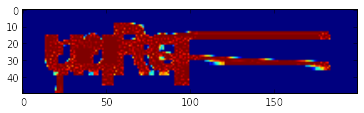

In [64]:
file_path = os.path.join(image_dir, random.choice(files))
input = (file_path.rsplit("/", 1)[1].split("_")[1].split(".jpg")[0])
print "input:  ",len(input),input
#Converted image.
imshow(numpy.asarray(Image.open(file_path).convert('L')))
predicted_chars, char_probabilities = cracker.InferFromImagePath(file_path)
output = "".join(x for x in predicted_chars if x != 'unk' )
print "output: ", len(output), output
for i in range(len(predicted_chars)): 
    print 'predicted_char= {0}'.format(predicted_chars[i]) 
    print sorted([(char, prob) for char, prob in char_probabilities[i].iteritems()], key=lambda x: x[1], reverse=True)[:10]